## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `4_domain_plots` 
### Using the clean netcdfs to make simple plots

Notebook contents 
* dah and side of ridge figures 
* dce and chm figures, etc.

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import csv 
# import copy 
# import os.path 

import geopandas as gpd
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 
# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_simple.nc')

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
# define path to save the figures to
figure_path = "C:\\Users\\Lumbr\\OneDrive - UW\\Documents - mountainhydro\\People\\CassieLumbrazo\\EasternCascades\\Writing\\5_Manuscript\\2_PostDefense\\python_figures\\"
# # export the figure with high resolution
# figure_name = 'dah_figure.png'
# plt.savefig(figure_path + figure_name, dpi=500)


In [5]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

In [24]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

## Plots

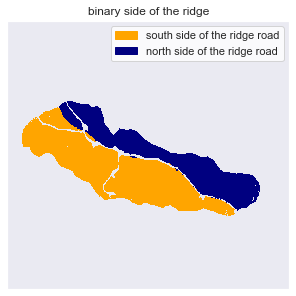

In [11]:
plt.figure(figsize=(4,4), constrained_layout = True)

# plot 3
ds['baf_ridge'].plot(vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"orange": "south side of the ridge road",
                "navy": "north side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

plt.legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

plt.title('binary side of the ridge')

plt.xlabel('');plt.ylabel('');plt.xticks([]);plt.yticks([])

# export the figure with high resolution
figure_name = 'side_of_ridge.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

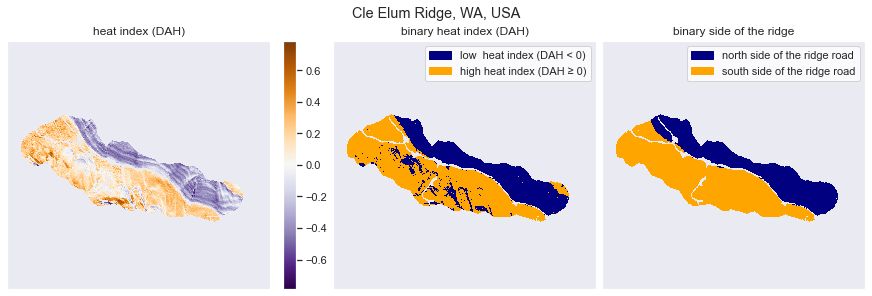

In [20]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,4), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# plot 1 and 2 for heat index
# ds.dah.plot(ax=axes[0],  vmin=-1, vmax=1, cmap='PuOr_r', cbar_kwargs={'label':''}) # setting the limit from -1 to 1 doesn't show the colors well...
ds.dah.plot(ax=axes[0], cmap='PuOr_r', cbar_kwargs={'label':''})

ds['dah_binary'].plot(ax=axes[1], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  


# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy" : "low  heat index (DAH < 0)", 
                 "orange": "high heat index (DAH ≥ 0)"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[0].set_title('heat index (DAH)')
axes[1].set_title('binary heat index (DAH)')


# plot 3
ds['baf_ridge'].plot(ax=axes[2], vmin=0, vmax=1, cmap=ListedColormap(['navy','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"navy": "north side of the ridge road", 
                 "orange": "south side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[2].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[2].set_title('binary side of the ridge')

axes[0].set_xlabel('')
axes[0].set_ylabel('') 
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].set_xlabel('')
axes[1].set_ylabel('') 
axes[1].set_xticks([])
axes[1].set_yticks([])

axes[2].set_xlabel('')
axes[2].set_ylabel('') 
axes[2].set_xticks([])
axes[2].set_yticks([])

# # add A, B, and C in the left hand corner of each plot
# axes[0].text(-0.1, 1.1, 'a)', transform=axes[0].transAxes,
#               fontsize=16, fontweight='bold', va='top')
# axes[1].text(-0.1, 1.1, 'b)', transform=axes[1].transAxes,
#                 fontsize=16, fontweight='bold', va='top')
# axes[2].text(-0.1, 1.1, 'c)', transform=axes[2].transAxes,
#                 fontsize=16, fontweight='bold', va='top')

# export the figure with high resolution
figure_name = 'dah_figure.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

In [17]:
# temporary code to fix the units, remove once I fix the netcdf 
ds['dce_ncalm'] = ds['dce_ncalm'] / 0.3048

# recalculate the differences
ds['diff_dce_rapid_ncalm'] = ds['dce_rapid'] - ds['dce_ncalm']

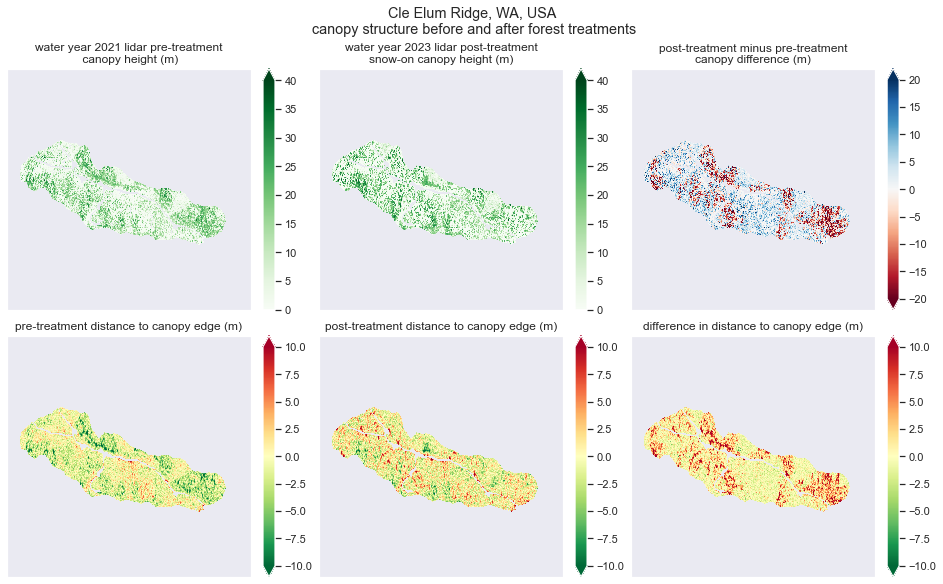

In [21]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13,8), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')

# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

axes[0,0].set_title('water year 2021 lidar pre-treatment\n canopy height (m)')
axes[0,1].set_title('water year 2023 lidar post-treatment\nsnow-on canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds['dce_ncalm'].plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
# ds.dce_snowoff.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (m)')


# some constants 
# row 1 
axes[0,0].set_xlabel(''); axes[0,0].set_ylabel(''); axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xlabel(''); axes[0,1].set_ylabel(''); axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[0,2].set_xlabel(''); axes[0,2].set_ylabel(''); axes[0,2].set_xticks([]); axes[0,2].set_yticks([])

# row 2
axes[1,0].set_xlabel(''); axes[1,0].set_ylabel(''); axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xlabel(''); axes[1,1].set_ylabel(''); axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[1,2].set_xlabel(''); axes[1,2].set_ylabel(''); axes[1,2].set_xticks([]); axes[1,2].set_yticks([])

# # row 3 
# axes[2,0].set_xlabel(''); axes[2,0].set_ylabel(''); axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
# axes[2,1].set_xlabel(''); axes[2,1].set_ylabel(''); axes[2,1].set_xticks([]); axes[2,1].set_yticks([])
# axes[2,2].set_xlabel(''); axes[2,2].set_ylabel(''); axes[2,2].set_xticks([]); axes[2,2].set_yticks([])

# export the figure with high resolution
figure_name = 'canopy_difference.png'
plt.savefig(figure_path + figure_name, dpi=800)

plt.show()

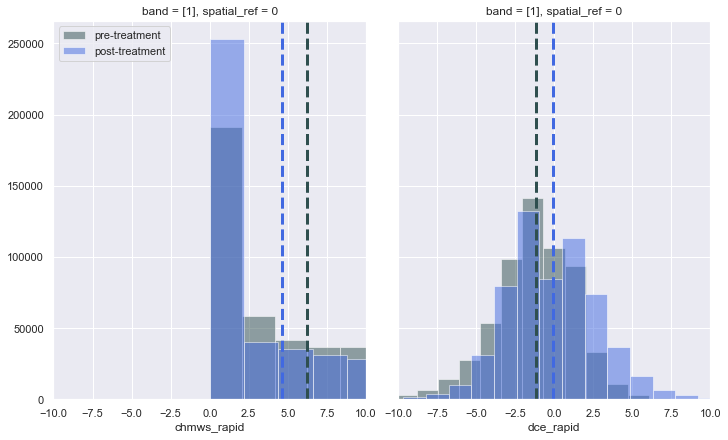

In [32]:
# create histograms of the differnce in canopy height and distance to canopy edge
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,6), constrained_layout = True)
ds['chmws_ncalm'].plot.hist(ax=axes[0], bins=20, color=colorpre, alpha=0.5, label='pre-treatment')
ds['chmws_rapid'].plot.hist(ax=axes[0], bins=20, color=colorpos, alpha=0.5, label='post-treatment')

ds['dce_ncalm'].plot.hist(ax=axes[1], bins=20, color=colorpre, alpha=0.5)
ds['dce_rapid'].plot.hist(ax=axes[1], bins=20, color=colorpos, alpha=0.5)

# add the median lines 
axes[0].axvline(ds['chmws_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[0].axvline(ds['chmws_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[1].axvline(ds['dce_ncalm'].median(), color=colorpre, linestyle='dashed', linewidth=3)
axes[1].axvline(ds['dce_rapid'].median(), color=colorpos, linestyle='dashed', linewidth=3)

axes[0].legend()

axes[1].set_xlim([-10,10])

plt.show()